In [1]:
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize': 'xx-large',
         'xtick.labelsize': 'x-large',
         'ytick.labelsize': 'x-large',
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

import h5py
import numpy as np
import os
import sys
import torch
import yaml
from scipy.optimize import curve_fit
from IPython.display import display, Markdown, Latex

%load_ext autoreload
%autoreload 2
sys.path.insert(1, '../code')
from geometric_features import GeometricFeaturizer, geo_name
from scalar_features import ScalarFeaturizer, scalar_name
from read_halos import SimulationReader
from fit import LinearFitter
from neural_net import NeuralNet, NNFitter
import plotter
import utils
import feature_importance

/ext3/miniconda3/envs/eqenv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
mssm_dir = '../data/data_MSSM'

In [13]:
sim_name = 'TNG100-1'

In [14]:
property_name_mssm = 'DarkMatterMass'

In [15]:
vals = np.load(f'{mssm_dir}/{sim_name}_{property_name_mssm}.npy')

In [20]:
print("N halos:", len(vals))

N halos: 108475


Text(0, 0.5, 'number in bin')

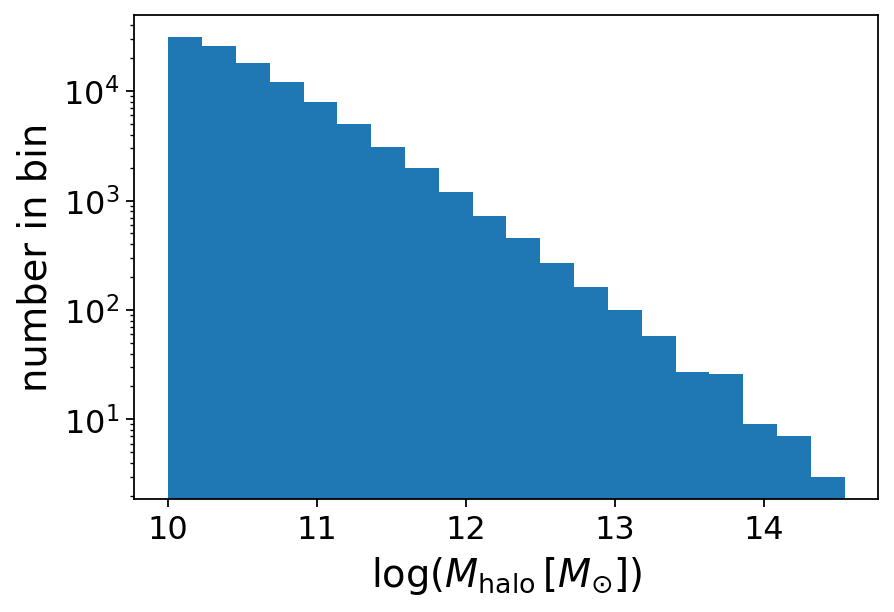

In [25]:
plt.hist(np.log10(vals), bins=20)
plt.yscale('log')
plt.xlabel(r'$\mathrm{log}(M_\mathrm{halo} \, [M_\mathrm{\odot}])$')
plt.ylabel("number in bin")

## My halo selection

In [36]:
fn_halos_mssm = '../data/halos/halos_TNG100-1/halos_TNG100-1_mssm.npy'
halos_mssm = np.load(fn_halos_mssm, allow_pickle=True)
print(len(halos_mssm))

87464


In [30]:
halos

array([], dtype=float64)

In [35]:
fn_halos_fid = '../data/halos/halos_TNG100-1/halos_TNG100-1.npy'
halos = np.load(fn_halos_fid, allow_pickle=True)
print(len(halos))

19670
